ในเคสนี้ เราจะใช้ Google Colab เป็น Notebook ส่วน Dataset เราจะดึงจาก Kaggle [วิธี Download kaggle.json ให้ดูจาก ep ที่แล้ว](https://www.bualabs.com/archives/751/multi-label-image-classification-satellite-imagery-deep-learning-machine-learning-image-classification-ep-5/#2.-ข้อมูล)

เมื่อได้ kaggle.json มาแล้ว ให้นำมาใส่ไว้ในโฟลเดอร์ My Drive/.kaggle ใน Google Drive ของเรา เป็น My Drive/.kaggle/kaggle.json

# 0. Install

เราจะต้อง Install kaggle เพื่อ Download Dataset และ geopandas เพื่อใช้ในการวิเคราะห์ข้อมูล geospatial (ถ้ายังไม่ได้ Install ให้ uncomment)

In [0]:
# ! pip install geopandas
# ! pip install kaggle --upgrade

# 1. Mount Google Drive

กำหนด path ของ Config File และ Dataset

In [0]:
config_path = '/content/drive'
dataset = 'alexisbcook/geospatial-learn-course-data'
data_path = '/content/datasets/' + dataset

Mount Google Drive เพื่อดึง Config File มาจาก Google Drive ส่วนตัวของเรา เมื่อเรารัน Cell ด้านล่างจะมีลิงค์ปรากฎขึ้นมาให้เรา Login กด Approve แล้ว Copy Authorization Code มาใส่ในช่องด้านล่าง

In [13]:
from google.colab import drive
drive.mount(config_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Download Dataset

กำหนด Environment Variable ไปยังโฟลเดอร์ที่เก็บ kaggle.json

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/My Drive/.kaggle"

สั่งดาวน์โหลด Dataset พร้อมทั้ง unzip ไว้ใน data_path

In [15]:
!kaggle datasets download {dataset} -p "{data_path}" --unzip

 93% 217M/233M [00:01<00:00, 154MB/s]
100% 233M/233M [00:01<00:00, 157MB/s]


# 3. Import Library

Import geopandas Library เพื่อใช้ในการวิเคราะห์ข้อมูล geospatial ตั้งชื่อเล่นเป็น gpd

In [0]:
import geopandas as gpd

# 4. Data

Load Shape File ที่แสดงตำแหน่งพิกัดของเงินกู้ของ Kiva

In [0]:
loans_filepath = data_path + "/kiva_loans/kiva_loans/kiva_loans.shp"

world_loans = gpd.read_file(loans_filepath)

ดูตัวอย่างข้อมูล สังเกต Column geometry จะมีข้อมูลเป็น Point

In [18]:
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


Load ข้อมูลแผนที่โลกขึ้นมา

In [19]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# 5. Plot

นำข้อมูลเงินกู้ Kiva มาพล็อตบนแผนที่โลก

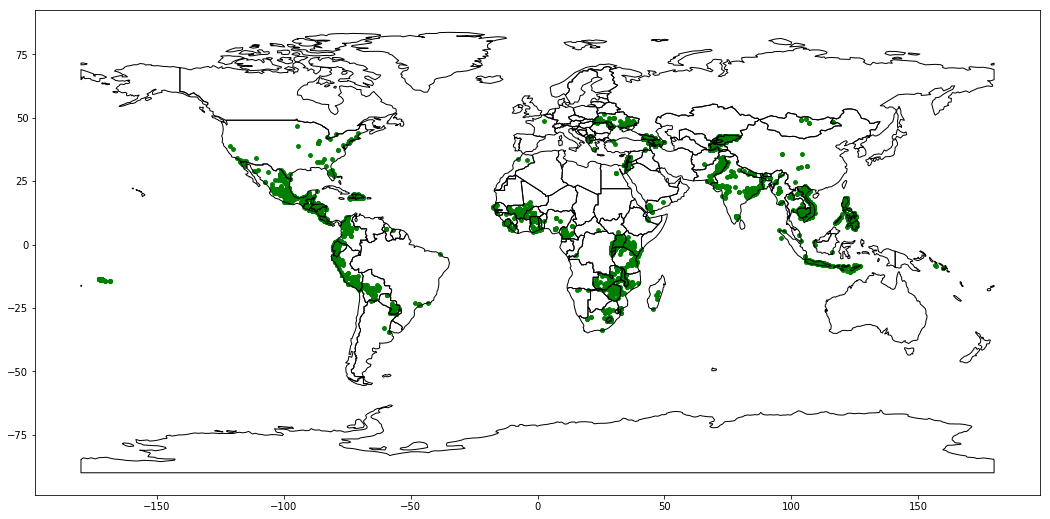

In [23]:
ax = world.plot(figsize=(18,10), color='none', edgecolor='black', zorder=3)
world_loans.plot(color='green', markersize=15, ax=ax)

# 6. Focus เฉพาะจุดที่เราสนใจ

กรองเฉพาะประเทศฟิลิปินส์

In [0]:
PHL_loans = world_loans[world_loans.country=='Philippines']

โหลดแผนที่ประเทศฟิลิปปินส์ขึ้นมา

In [25]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file(f"{data_path}/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


พล็อตตำแหน่งเงินกู้ Kiva บนแผนที่ประเทศฟิลิปปินส์

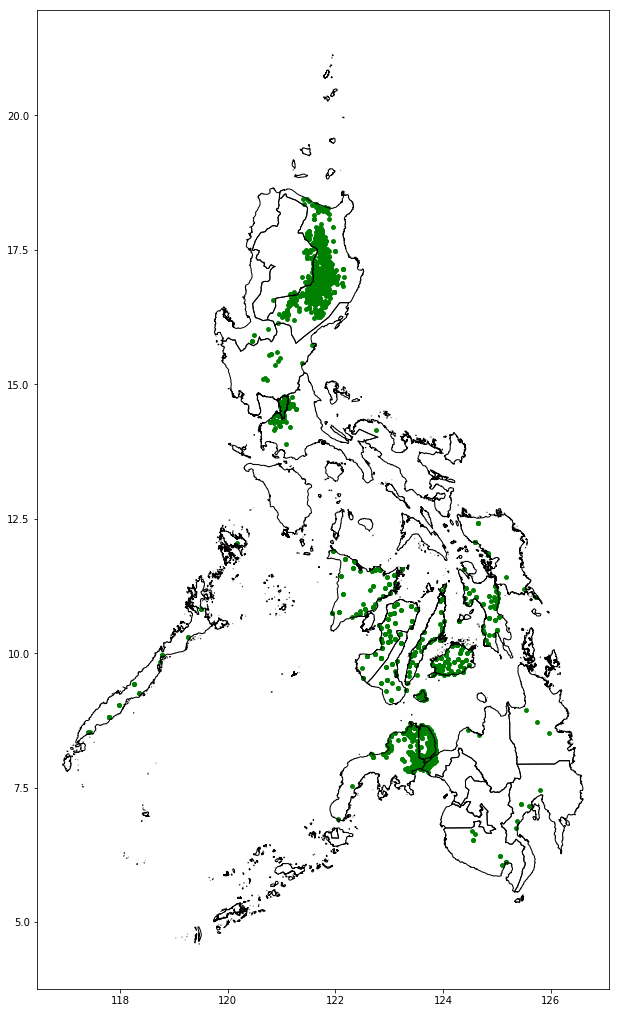

In [26]:
ax = PHL.plot(figsize=(18,18), color='none', edgecolor='black', zorder=3)
PHL_loans.plot(color='green', markersize=15, ax=ax)

สังเกตว่าเงินกู้ส่วนใหญ่ จะอยู่ในจังหวัดอะไร [คลิกดูแผนที่จังหวัดของประเทศฟิลิปปินส์](https://upload.wikimedia.org/wikipedia/commons/f/f6/Labelled_map_of_the_Philippines_-_Provinces_and_Regions.png)

# 7. สรุป

* เราได้เรียนรู้วิธีการใช้ Google Colab ดึงชุดข้อมูล Dataset จาก Kaggle
* เราได้ใช้ geopandas ในการพล็อตข้อมูลบนแผนที่ แบบง่าย
* สำหรับการใช้งานพิกัดแบบอื่น ๆ การวิเคราะห์ที่ซับซ้อนยิ่งขึ้น จะอธิบายต่อไป

# Credit

* https://www.kaggle.com/alexisbcook/your-first-map
* https://www.kiva.org/
* https://www.bualabs.com/archives/751/multi-label-image-classification-satellite-imagery-deep-learning-machine-learning-image-classification-ep-5/
* http://geopandas.org/gallery/index.html